<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_21_Bar_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-23 01:26:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.6MB/s    in 2.6s    

2025-04-23 01:26:51 (59.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



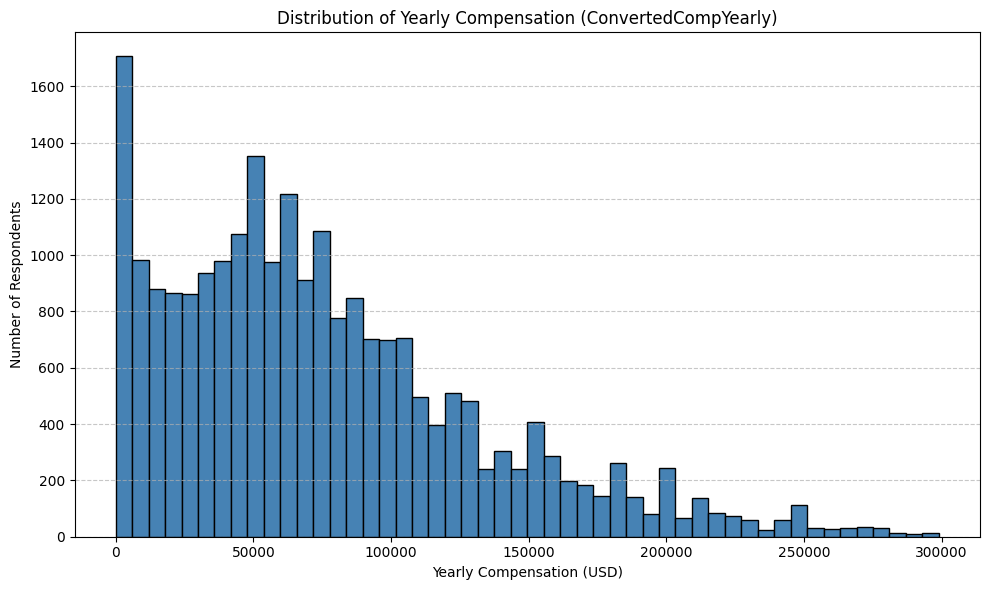

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure compensation is numeric and drop NaNs
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp_data = df['ConvertedCompYearly'].dropna()

# Optional: Filter out extreme outliers for a clearer histogram
comp_data = comp_data[comp_data < 300000]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



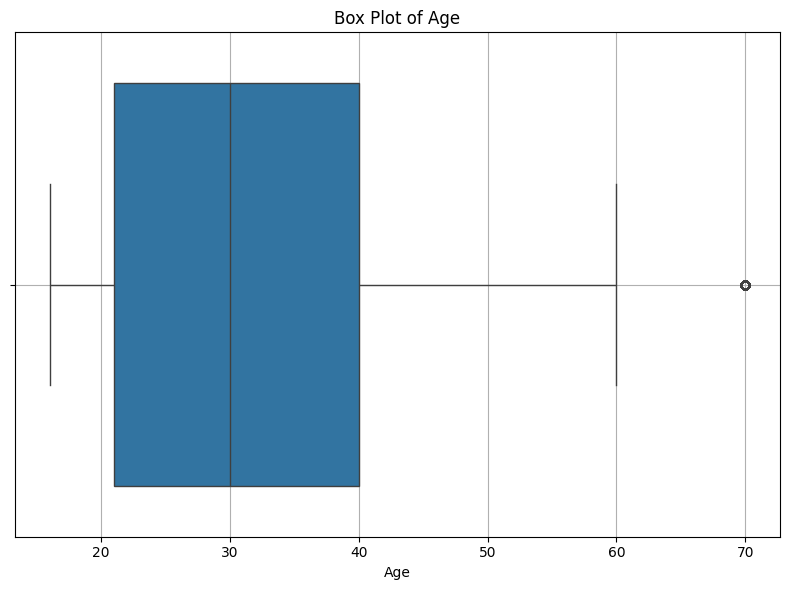

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Age range to numeric mid-point values
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  # Handle 'Prefer not to say' if needed
}

df['AgeNumeric'] = df['Age'].map(age_map)

# Drop any NaN values from AgeNumeric
df_age_numeric = df['AgeNumeric'].dropna()

# Plotting the Box Plot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_age_numeric)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



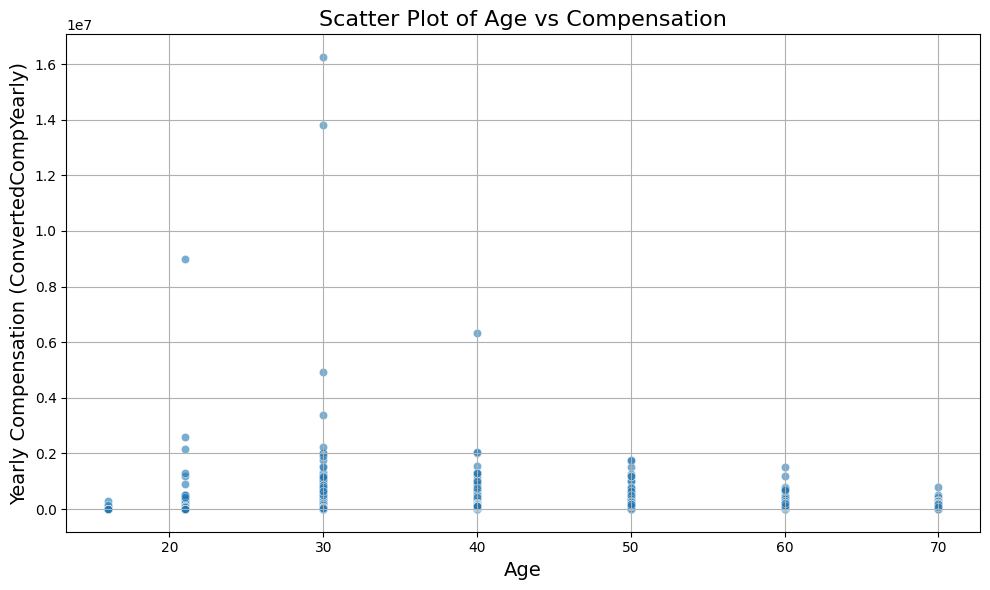

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between Age_numeric and ConvertedCompYearly
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AgeNumeric', y='ConvertedCompYearly', alpha=0.6)

# Adding titles and labels
plt.title('Scatter Plot of Age vs Compensation', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


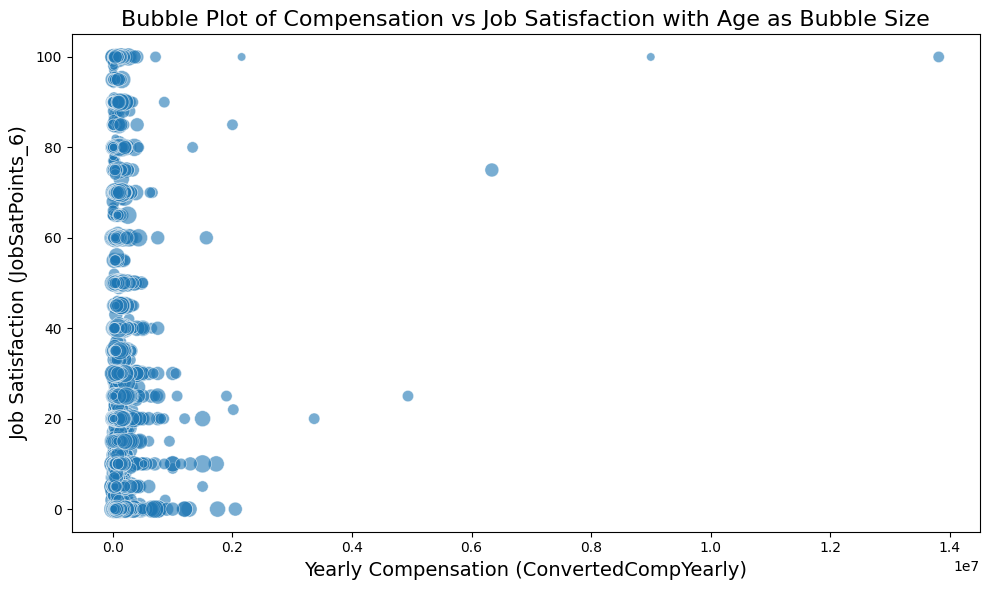

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bubble plot for compensation and job satisfaction, with age as bubble size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6',
                size='AgeNumeric', sizes=(20, 200), alpha=0.6, legend=None)

# Adding titles and labels
plt.title('Bubble Plot of Compensation vs Job Satisfaction with Age as Bubble Size', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



/tmp/ipykernel_1472/663838401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mainbranch_counts.index, x=mainbranch_counts.values, orient='h', palette='viridis')


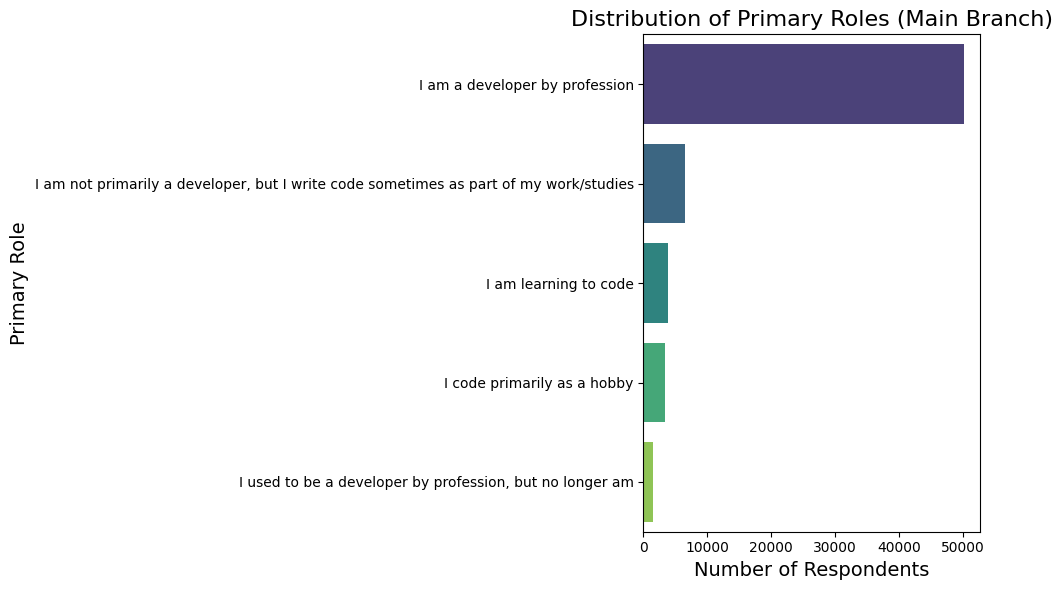

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in the 'MainBranch' column
mainbranch_counts = df['MainBranch'].value_counts()

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=mainbranch_counts.index, x=mainbranch_counts.values, orient='h', palette='viridis')

# Adding titles and labels
plt.title('Distribution of Primary Roles (Main Branch)', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Primary Role', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_1472/385599233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')


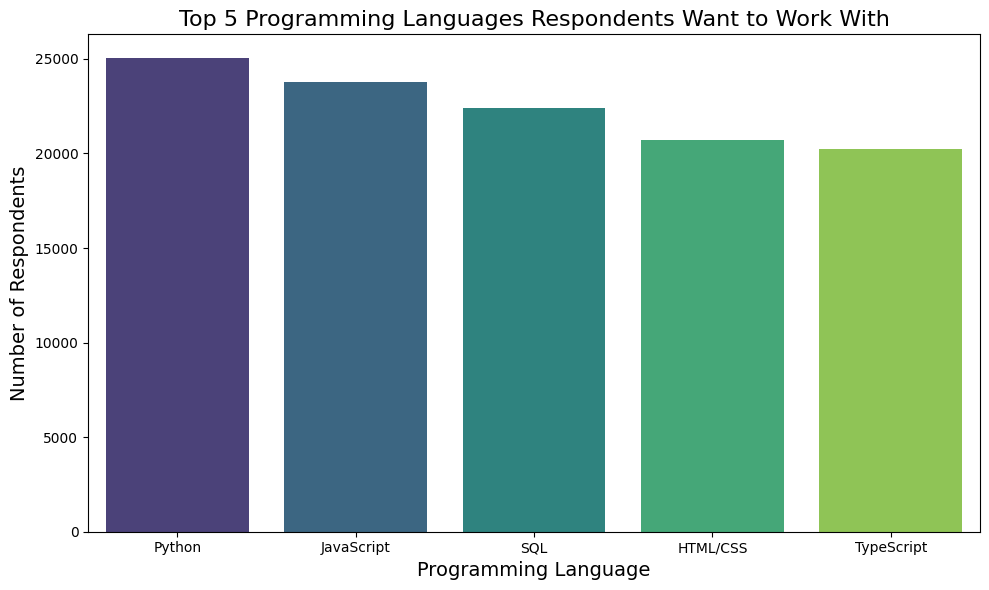

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the 'LanguageWantToWorkWith' column by ';' and flatten the list to count the individual languages
languages_list = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Count the occurrences of each language and get the top 5
top_languages = languages_list.value_counts().head(5)

# Plotting a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')

# Adding titles and labels
plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_1472/2754792945.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


<Figure size 1000x600 with 0 Axes>

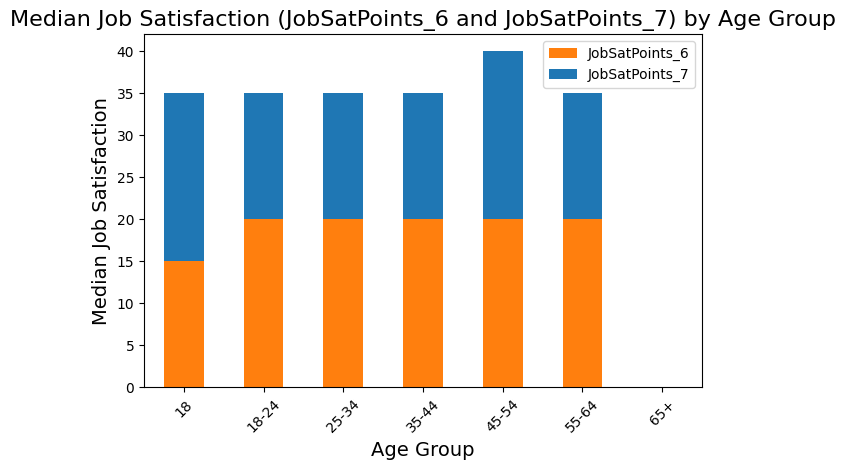

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the cleaned dataset
age_bins = [16, 21, 30, 40, 50, 60, 70, 100]
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  # Handle 'Prefer not to say' if needed
}

df['Age_numeric'] = df['Age'].map(age_map)

# Step 4: Remove rows where 'Age_numeric' is NaN (e.g., 'Prefer not to say')
df_cleaned = df.dropna(subset=['Age_numeric'])

age_labels = ['18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age_numeric'], bins=age_bins, labels=age_labels)
# Grouping the data by age and calculating the median for JobSatPoints_6 and JobSatPoints_7
median_satisfaction = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
median_satisfaction.plot(kind='bar', stacked=True, color=['#FF7F0E', '#1F77B4'])

# Adding titles and labels
plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Median Job Satisfaction', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



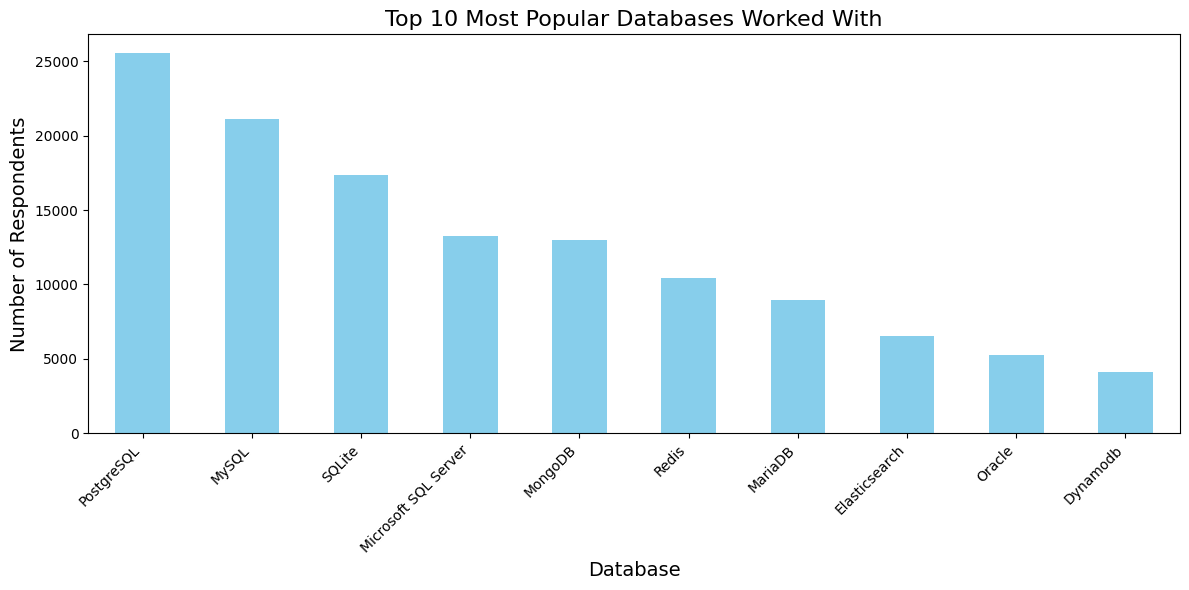

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the cleaned dataset

# Extract the databases from the DatabaseHaveWorkedWith column
# First, we need to split the database entries (in case there are multiple databases per row)
databases = df['DatabaseHaveWorkedWith'].dropna().str.split(';').explode()

# Count the occurrences of each database
database_counts = databases.value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
database_counts.head(10).plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Top 10 Most Popular Databases Worked With', fontsize=16)
plt.xlabel('Database', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_1472/3541433044.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_compensation_by_age = df.groupby('AgeGroup')['ConvertedCompYearly'].median()


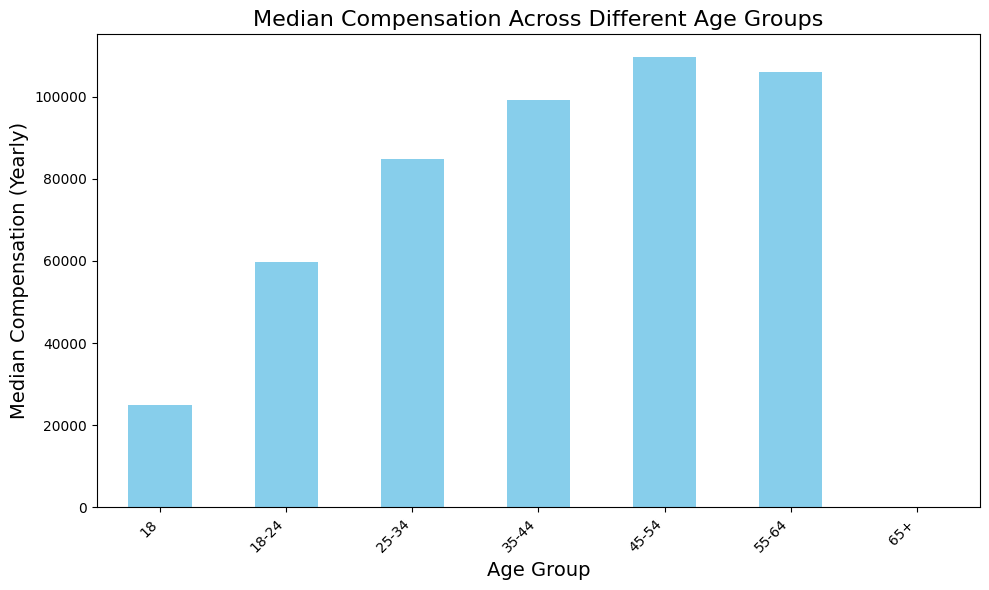

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the cleaned dataset
# Group by age and calculate the median of ConvertedCompYearly
median_compensation_by_age = df.groupby('AgeGroup')['ConvertedCompYearly'].median()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
median_compensation_by_age.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Median Compensation Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Median Compensation (Yearly)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



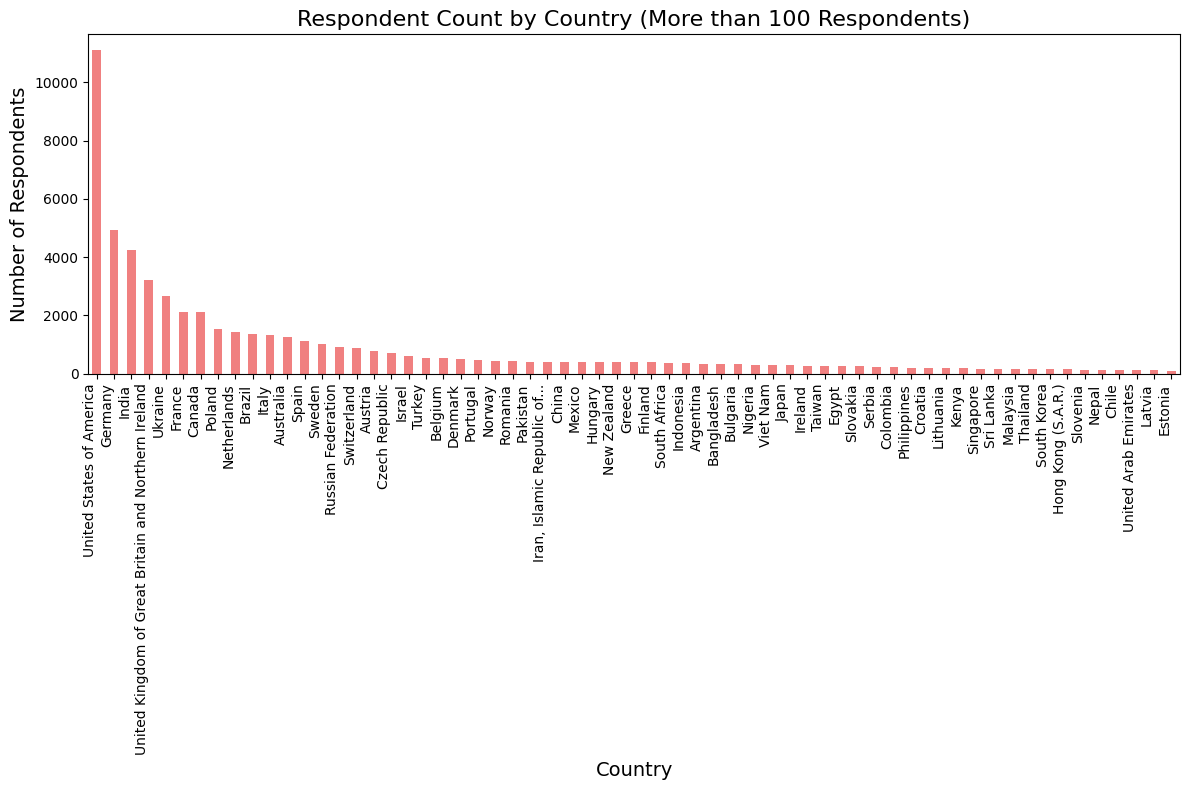

In [ ]:
import pandas as pd

# Count the number of respondents per country
country_counts = df['Country'].value_counts()

# Filter the countries that have more than 100 respondents
countries_with_100plus_respondents = country_counts[country_counts > 100].index

# Filter the original DataFrame to include only those countries
filtered_df = df[df['Country'].isin(countries_with_100plus_respondents)]

# Now you can visualize the filtered data
import matplotlib.pyplot as plt

# Grouping by filtered countries and counting the number of respondents
filtered_respondent_count_by_country = filtered_df['Country'].value_counts()

# Plotting the bar chart for filtered countries
plt.figure(figsize=(12, 8))
filtered_respondent_count_by_country.plot(kind='bar', color='lightcoral')

# Adding titles and labels
plt.title('Respondent Count by Country (More than 100 Respondents)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
